In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import pickle
from functions_variables import *

## Import final dataset

In [2]:
X_train = pd.read_csv('../data/final/X_train.csv')
X_test = pd.read_csv('../data/final/X_test.csv')

X_train_scaled = pd.read_csv('../data/final/X_train_scaled.csv')
X_test_scaled = pd.read_csv('../data/final/X_test_scaled.csv')
y_train = pd.read_csv('../data/final/y_train.csv')
y_test = pd.read_csv('../data/final/y_test.csv')

### Get predicted values to be used for backtesting

In [3]:
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [4]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Index Up  806 non-null    bool 
dtypes: bool(1)
memory usage: 934.0 bytes


In [5]:
y_pred.shape

(806,)

In [6]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

### Import the same scaler used to scale the data originally so I can unscale them properly

In [7]:
with open('../data/final/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
# Unscale the data back to its original scale
X_test_unscaled = scaler.inverse_transform(X_test_scaled)

# Convert back to a DataFrame if needed
X_test_unscaled_df = pd.DataFrame(X_test_unscaled, columns=X_test_scaled.columns)

Unscaled data results in the same as X_test and will be used for back testing

In [8]:
X_test_unscaled_df.head()

,WTI Price,Natural Gas Price,Aluminum Price,Gold Price,Platinum Price,Silver Price,Lumber Price,Interest_Rate,GDP,Unemployment,...,USDCAD,10 YR Bond Yield,Month,Day,DayofWeek,EMA Slope,EMA/Close,RSI,MACD Histogram,Daily Volatility
0,69.99,4.641,2695.0,1811.5,996.9,23.918,516.9,0.25,2105441.0,8.1,...,1.2551,1.15,9.0,2.0,3.0,27.922810,0.987244,71.200613,21.534832,0.004086
1,69.29,4.712,2727.0,1833.7,1024.5,24.802,547.2,0.25,2105441.0,8.1,...,1.2526,1.19,9.0,3.0,4.0,27.769209,0.987330,76.426885,26.159162,0.003876
2,68.75,4.724,2727.0,1833.7,1019.7,24.802,547.2,0.25,2105441.0,8.1,...,1.2526,1.19,9.0,5.0,6.0,25.124523,0.988537,83.828044,26.932888,0.003511
3,68.80,4.693,2773.0,1798.5,1018.3,24.373,547.2,0.25,2105441.0,8.1,...,1.2537,1.19,9.0,6.0,0.0,22.731711,0.989628,81.238101,25.191185,0.003352
4,68.35,4.568,2757.0,1797.4,998.9,24.373,518.0,0.25,2105441.0,8.1,...,1.2647,1.23,9.0,7.0,1.0,19.157262,0.991253,79.710274,20.962244,0.003385


In [9]:
df = X_test_unscaled_df[['TSX']]
df.head()

,TSX
0,20795.12
1,20821.43
2,20821.43
3,20821.43
4,20806.63


In [10]:
df.loc[:, 'Predict'] = y_pred
df.head()

/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/3113303615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Predict'] = y_pred


,TSX,Predict
0,20795.12,1
1,20821.43,1
2,20821.43,0
3,20821.43,1
4,20806.63,1


Set initial seed of $1M and zero shares of the TSX. The TSX is an index, so you can't really trade, except through an ETF, which is why I started with a seed investment of $1M since the index starts at 20,795.

In [11]:
# $1,000,000
investment = 1000000
shares = 0

# Initialize columns
df['Price'] = 0
df['Cummulative Investment'] = 0
df['Shares Held'] = 0
df['Action'] = ''
df['Buy'] = 0

/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/945706347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = 0
/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/945706347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cummulative Investment'] = 0
/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/945706347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<p>Iterate over TSX value and prediction to calculate the appropriate trade, cummulative investment, shares held using a custom built function</p>

In [12]:
for index, row in df.iterrows():
    if index > 0:  # Ensure there is a prior row
        open = df.loc[index - 1, 'TSX'] 
        df.loc[index, 'Price'] = row['TSX']
        investment, shares, action, avg = trade(open, row['TSX'], index - 1, df, shares, investment, row['Predict'])
        df.loc[index, 'Cummulative Investment'] = investment 
        df.loc[index, 'Shares Held'] = shares 
        df.loc[index, 'Action'] = action 
        df.loc[index, 'Average Price'] = avg
        if action == 'buy':
            df.loc[index, 'Buy'] = row['TSX']


        



/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/1664055277.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20821.43' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'Price'] = row['TSX']
/Users/kennethwall/Documents/Data Science/Projects/LHL-Final-Project-Stock-Price-Prediction/notebooks/functions_variables.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = (df['Buy'] == 0).cumsum()
/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/1664055277.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [13]:
df['Buy'] = df['Buy'].fillna(0)

/var/folders/vl/xjjnctgs1s30y4rth02ltgm00000gn/T/ipykernel_74972/1963523397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy'] = df['Buy'].fillna(0)


In [19]:
df.head(60) # ensure that the trade function is calclating everything correctly. All Good!!

,TSX,Predict,Price,Cummulative Investment,Shares Held,Action,Buy,Group,Average Price
0,20795.12,1,0.00,0.00,0,,0.00,1,NaN
1,20821.43,1,20821.43,1000000.00,0,hold,0.00,2,inf
2,20821.43,0,20821.43,979178.57,1,buy,20821.43,2,inf
3,20821.43,1,20821.43,979178.57,1,hold,0.00,3,2.082143e+04
4,20806.63,1,20806.63,979178.57,1,hold,0.00,4,inf
5,20741.79,0,20741.79,958371.94,2,buy,20741.79,4,inf
6,20705.27,0,20705.27,937630.15,3,buy,20705.27,4,2.074179e+04
7,20633.06,0,20633.06,916924.88,4,buy,20633.06,4,2.072353e+04
8,20633.06,0,20633.06,896291.82,5,buy,20633.06,4,2.069337e+04
9,20666.41,1,20666.41,896291.82,5,hold,0.00,5,2.067830e+04


In [15]:
total_return = df['Cummulative Investment'].iloc[-1] - 1000000
final_position = 2 * 21413.15
total_return = total_return + final_position
print(f'Total gain for backtested prediction on test set was {total_return:.2f}')

Total gain for backtested prediction on test set was 18237.01


Total gain for backtested model is $18,237.01 before fees. If you include $10 fees per trade which is common the total gain is reduced to $13,347.01. The trading strategy for this model buys and sells very frequently so fees play a big part in the investment return

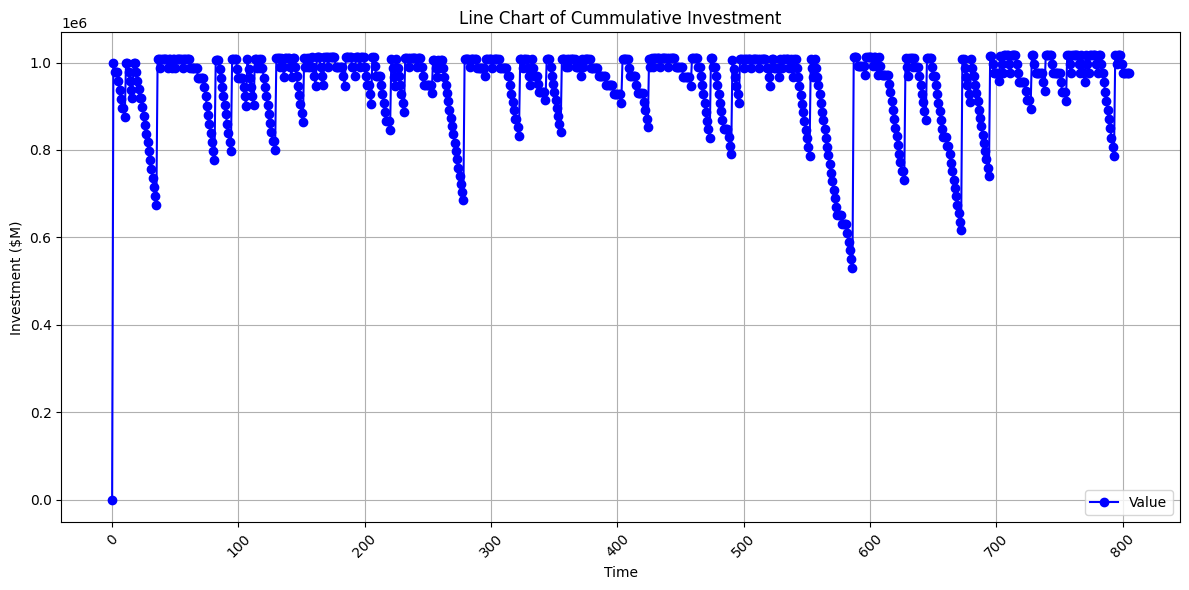

In [18]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df.index, df['Cummulative Investment'], marker='o', linestyle='-', color='b', label='Value')  # Plot the line chart

# Customize the plot
plt.title('Line Chart of Cummulative Investment')  # Set the title
plt.xlabel('Time')  # Label for x-axis
plt.ylabel('Investment ($M)')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust the padding between and around subplots

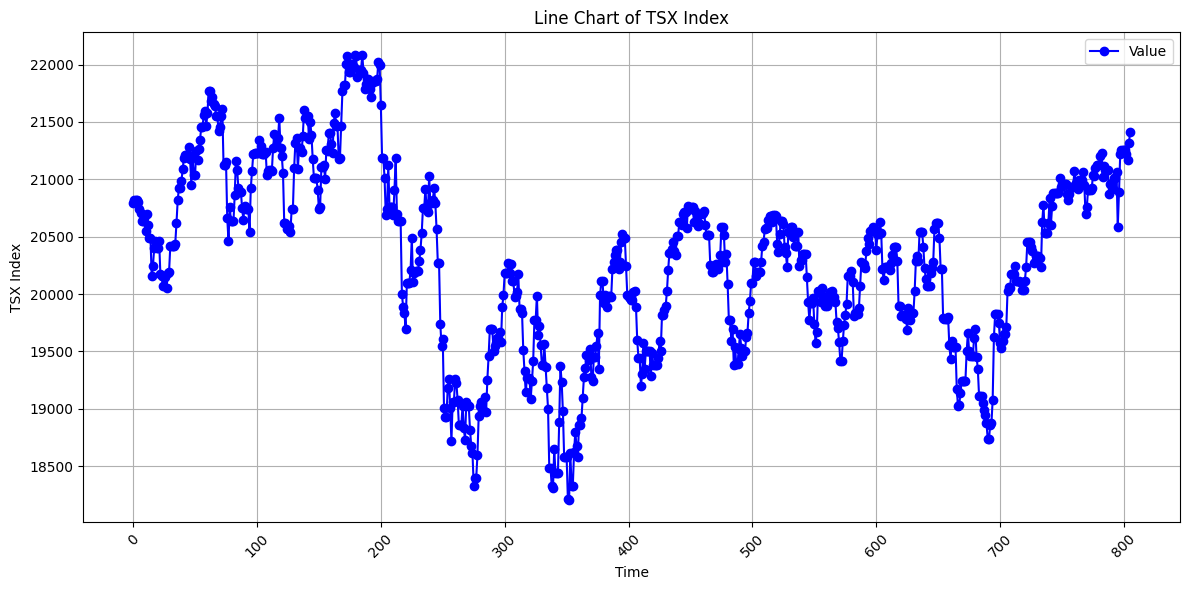

In [17]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df.index, df['TSX'], marker='o', linestyle='-', color='b', label='Value')  # Plot the line chart

# Customize the plot
plt.title('Line Chart of TSX Index')  # Set the title
plt.xlabel('Time')  # Label for x-axis
plt.ylabel('TSX Index')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust the padding between and around subplots